In [3]:
# Dependencies
import pandas as pd
import tweepy
import time
import json
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import cycle
from config import consumer_key, consumer_secret, access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [28]:
sources = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']
listofdicts = []
#Loop through sources
for x in sources:
    # Target User Account
    target_user = x
    i = 0
    # Loop through 5 pages of tweets (total 100 tweets)
    for y in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, page=y)

        # Loop through all tweets
        for tweet in public_tweets:

            tweetdict = {}

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])

            # Add each value to temporary dictionary
            tweetdict['source'] = target_user
            tweetdict['content'] = tweet['text']
            tweetdict['date'] = time.strftime('%#m-%#d-%Y', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
            tweetdict['compound'] = results["compound"]
            tweetdict['pos'] = results["pos"]
            tweetdict['neu'] = results["neu"]
            tweetdict['neg'] = results["neg"]
            tweetdict['tweetsago'] = i
            i += 1
            #Add copy of dictionary to list
            listofdicts.append(tweetdict.copy())
print(len(listofdicts))

500


In [29]:
#Convert list of dictionaries into dataframe
df = pd.DataFrame(listofdicts)
df.head(5)

,compound,content,date,neg,neu,pos,source,tweetsago
0,0.0000,🎬✨ @itsanitarani learns the secrets behind Bol...,8-13-2018,0.000,1.000,0.000,@BBC,0
1,-0.3182,Ballet-loving Pollyana lost her leg as a toddl...,8-13-2018,0.099,0.901,0.000,@BBC,1
2,0.2500,Follow 26-year-old Teleri Fielden as she pursu...,8-13-2018,0.000,0.895,0.105,@BBC,2
3,0.0000,The US pack dogs taking on the rhino poachers ...,8-13-2018,0.000,1.000,0.000,@BBC,3
4,0.0000,"From the Arctic to chocolate, here are some th...",8-13-2018,0.000,1.000,0.000,@BBC,4


In [30]:
#Reorder columns
df = df[['source', 'tweetsago', 'content', 'date', 'compound', 'pos', 'neu', 'neg']]
df.head()

,source,tweetsago,content,date,compound,pos,neu,neg
0,@BBC,0,🎬✨ @itsanitarani learns the secrets behind Bol...,8-13-2018,0.0000,0.000,1.000,0.000
1,@BBC,1,Ballet-loving Pollyana lost her leg as a toddl...,8-13-2018,-0.3182,0.000,0.901,0.099
2,@BBC,2,Follow 26-year-old Teleri Fielden as she pursu...,8-13-2018,0.2500,0.105,0.895,0.000
3,@BBC,3,The US pack dogs taking on the rhino poachers ...,8-13-2018,0.0000,0.000,1.000,0.000
4,@BBC,4,"From the Arctic to chocolate, here are some th...",8-13-2018,0.0000,0.000,1.000,0.000


In [69]:
#Print dataframe to CSV
df.to_csv('MediaTweets.csv', index=False)

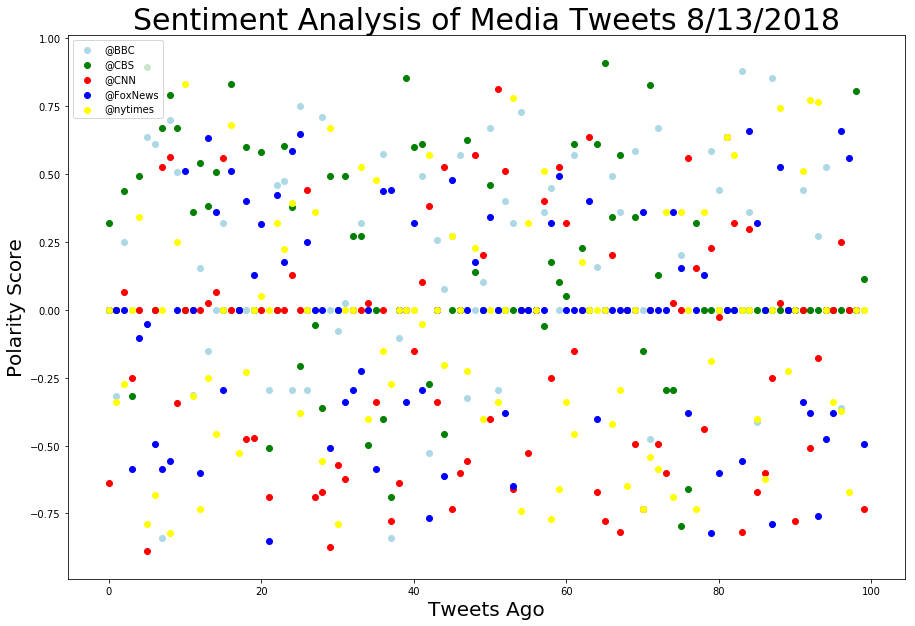

In [65]:
#Display and print scatter plot
currentdate = time.strftime('%#m/%#d/%Y', time.localtime())
plt.figure(figsize=(15,10))
plt.title(f'Sentiment Analysis of Media Tweets {currentdate}', fontsize = 30)
plt.xlabel('Tweets Ago', fontsize = 20)
plt.ylabel('Polarity Score', fontsize = 20)
color_gen = cycle(('lightblue', 'green', 'red', 'blue', 'yellow'))
#Loop through scources and plot each one with it's own color
for z in sources:
    plt.scatter(df[df.source == z]['tweetsago'], 
                df[df.source == z]['compound'], 
                c=next(color_gen),
                label=z)
plt.legend(loc='best')
plt.savefig('Scatter.png')

In [50]:
#Group tweets by source and find mean scores
df2 = df.groupby('source').mean()
df2

,tweetsago,compound,pos,neu,neg
source,,,,,
@BBC,49.5,0.123694,0.08806,0.86847,0.04346
@CBS,49.5,0.139859,0.08090,0.89036,0.02874
@CNN,49.5,-0.128398,0.06468,0.83172,0.10360
@FoxNews,49.5,-0.034312,0.06524,0.84791,0.08681
@nytimes,49.5,-0.066002,0.06138,0.85516,0.08345


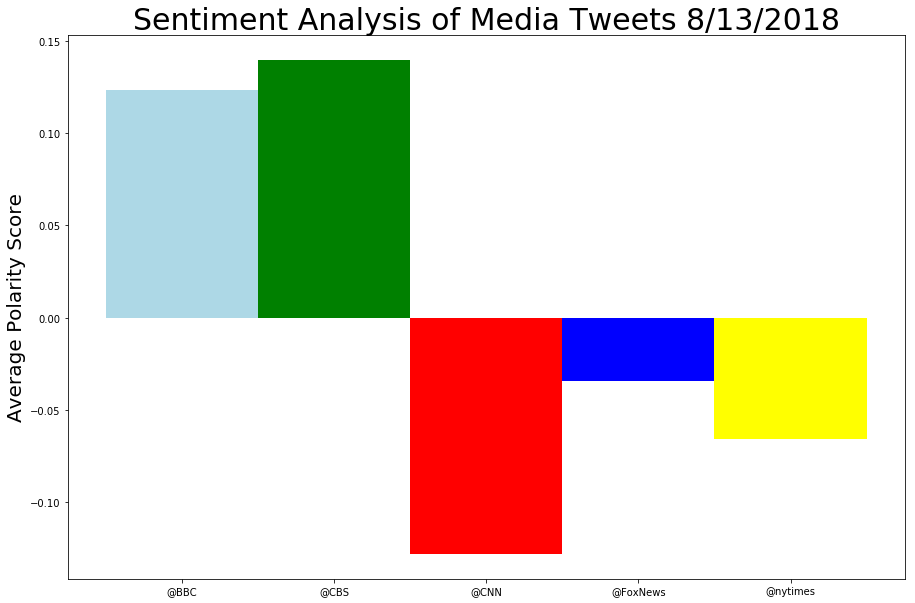

In [82]:
#Display and print bar chart
currentdate = time.strftime('%#m/%#d/%Y', time.localtime())
plt.figure(figsize=(15,10))
plt.title(f'Sentiment Analysis of Media Tweets {currentdate}', fontsize = 30)
plt.ylabel('Average Polarity Score', fontsize = 20)
plt.bar(df2.index, df2['compound'], width = 1, color = ['lightblue', 'green', 'red', 'blue', 'yellow'], align='center')
plt.savefig('Bar.png')